## Install CaImAn if on Google Colab


In [ ]:
try:
    import google.colab
    import os
    if os.path.isdir('/content/CaImAn'):
        print('Doing nothing, caiman already installed')
        print('If you need to reinstall delete current runtime')
    else:
        !git clone --depth 1 https://github.com/flatironinstitute/CaImAn.git
        %cd /content/CaImAn
        !pip install -r requirements.txt
        !pip install -e .
        !python caiman/caimanmanager.py install --inplace
except:
    pass

In [1]:
try:
    import google.colab
    import os
    if os.path.isdir('/content/CaImAn'):
        print('Doing nothing, caiman already installed')
        print('If you need to reinstall delete current runtime')
    else:
        !git clone --depth 1 https://github.com/flatironinstitute/CaImAn.git
        %cd /content/CaImAn
        !pip install -r requirements.txt
        !pip install -e .
        !caimanmanager install
except:
    pass

Cloning into 'CaImAn'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (227/227), done.
remote: Compressing objects: 100% (212/212), done.
remote: Total 227 (delta 13), reused 125 (delta 8), pack-reused 0
Receiving objects: 100% (227/227), 118.88 MiB | 12.05 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (205/205), done.
/content/CaImAn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.1/298.1 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.0/134.0 kB 17.7 MB/s eta 0:00:0

## Pipeline for real-time processing of microendoscopic data with CaImAn
This demo presents 3 approaches for processing microendoscopic data in real time using CaImAn.
1. Sufficiently long initialization phase to identify all ROIs  followed by tracking
2. Short initalization phase followed by online processing using OnACID-E
3. Short initalization phase followed by online processing using Ring-CNN+OnACID

All approached include:
- Motion Correction using the NoRMCorre algorithm
- Source extraction using a variant of the CNMF algorithm
- Deconvolution using the OASIS algorithm

OnACID-E and Ring-CNN further include
- Detection of new components
- Refinement of neural spatial footprints (and background in the case of OnACID-E)

@author: Johannes Friedrich @j-friedrich. Special thanks to Bernardo Sabatini and his lab at Harvard Medical School for sharing the data used in this demo.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
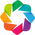

In [2]:
import bokeh.plotting as bpl
import cv2
import holoviews as hv
import logging
import matplotlib.pyplot as plt
from multiprocessing import Process, Queue, set_start_method
import numpy as np
from scipy.sparse import csr_matrix
from sys import platform
import tensorflow as tf
from time import time, sleep

try:
    if __IPYTHON__:
        get_ipython().run_line_magic('load_ext', 'autoreload')
        get_ipython().run_line_magic('autoreload', '2')
except NameError:
    pass

logging.basicConfig(format=
                          "%(relativeCreated)12d [%(filename)s:%(funcName)10s():%(lineno)s] [%(process)d] %(message)s",
                    # filename="/tmp/caiman.log",
                    level=logging.WARNING)

import caiman as cm
from caiman.source_extraction import cnmf
from caiman.source_extraction.cnmf.online_cnmf import demix1p
from caiman.utils.nn_models import (fit_NL_model, create_LN_model, quantile_loss, rate_scheduler)
from caiman.utils.utils import download_demo

bpl.output_notebook()
hv.notebook_extension('bokeh')

In [3]:
if platform in ('linux', 'darwin'):
    set_start_method('fork')

In [4]:
import h5py
fname = 'foo.tif'
with h5py.File(download_demo('blood_vessel_10Hz.mat')) as f:
    cm.movie(f['Y'][:3000,64:-64,64:-64]).save(fname)
# equivalent to
# cm.load(download_demo('blood_vessel_10Hz.mat'), var_name_hdf5='Y',
#         subindices=slice(0,3000), bottom=64, top=64, left=64, right=64).save(fname)

Exception: ignored

Below, we mention the code that can be used to read directly from the camera.<br/>
In this demo we simulate it by reading frame by frame from a file instead, so that everybody can execute the demo.
The `download_demo` function will download the file (if not already present) and store it inside your caiman_data/example_movies folder. We create an `iterator` over the file that returns the next imaged frame when calling `next(iterator)`.<br/>
Here we define a function that creates and returns such an iterator. It works for both, a file or an imaging device.

In [ ]:
def get_iterator(device=0, fr=None):
    """
    device: device number (int) or filename (string) for reading from camera or file respectively
    fr: frame rate
    """
    if isinstance(device, int):  # capture from camera
        def capture_iter(device=device, fr=fr):
            cap = cv2.VideoCapture(device)
            if fr is not None:  # set frame rate
                cap.set(cv2.CAP_PROP_FPS, fr)
            while True:
                yield cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2GRAY)
        iterator = capture_iter(device, fr)
    else:  # read frame by frame from file
        iterator = cm.base.movies.load_iter(device, var_name_hdf5='Y')
    return iterator

In [ ]:
# iterator = get_iterator(0)

In [ ]:
# plt.imshow(next(iterator))

## 1. Sufficiently long initialization phase to identify all ROIs  followed by tracking

### Record for few minutes
The `download_demo` function will download the file (if not already present) and store it inside your caiman_data/example_movies folder.

In [ ]:
init_batch = 1500  # number of frames to use for initialization
T = 3000           # total number of frames
fr = 10            # frame rate (Hz)

iterator = get_iterator(fname)

m = cm.movie(np.array([next(iterator) for t in range(init_batch)], dtype='float32'))

### Take a break from imaging to process recorded data
Taking a break to keep this demo simple. One could in parallel continue to save the otherwise "lost" frames to disk if one was not only intersted in the real-time experiment but post-analysis of the entire session

In [ ]:
fname_init = m.save('init.mmap', order='C')

In [ ]:
params_dict = {'fnames': fname_init,            # filename(s) to be processed
               'fr': fr,                        # frame rate (Hz)
               'method_init': 'corr_pnr',       # use corr_pnr for initialization of 1p data
               'K': None,                       # upper bound on number of components per patch, in general None
               'gSig': (3, 3),                  # gaussian width of a 2D gaussian kernel, which approximates a neuron
               'gSiz': (13, 13),                # average diameter of a neuron, in general 4*gSig+1
               'merge_thr': .65,                # merging threshold, max correlation allowed
               'p': 1,                          # order of the autoregressive system
               'tsub': 1,                       # downsampling factor in time for initialization
               'ssub': 1,                       # downsampling factor in space for initialization
               'only_init': True,               # set it to True to run CNMF-E
               'nb': 0,                         # number of background components (rank) if positive,
                                                # set it to 0 to use the exact ring model and return background as b0 and W
               'min_corr': .7,                  # min peak value from correlation image
               'min_pnr': 7,                    # min peak to noise ration from PNR image
               'normalize_init': False,         # whether to equalize the movies during initialization
               'ring_size_factor': 1.4,         # radius of ring is gSiz*ring_size_factor
               'center_psf': True,              # whether to center the Gaussian convolution kernel, set it to True for 1 photon
               'init_iter': 1,                  # number of iterations during corr_pnr (1p) initialization
               's_min': -10,                    # minimum spike threshold
               'init_batch': init_batch,        # length of mini batch for initialization
               'init_method': 'cnmf',           # initialization method for initial batch
               'use_dense': False,              # flag for representation and storing of A and b
               'motion_correct': True,          # flag for performing motion correction
               'gSig_filt': (3, 3),             # size of high pass spatial filtering, used in 1p data
                                                # the next 3 lines turn off shape updates during online processing
               'update_num_comps': False,       # whether to search for new components
               'batch_update_suff_stat': True,  # whether to update sufficient statistics in batch mode
               'update_freq' : -np.inf}         # update each shapes and sufficient statistics every X frames
opts = cnmf.params.CNMFParams(params_dict=params_dict)

In [ ]:
cnm1 = cnmf.online_cnmf.OnACID(dview=None, params=opts)
cnm1.initialize_online(T=T)

#### Alternatively we could initialize using any other pipeline that models the movie data as $Y=A C + B + N$ with spatial components $A$, temporal components $C$, background $B$, and noise $N$

In [ ]:
# def init_from_other_pipeline(cnm, movie, A, C, T):
#     Yr = movie.reshape(len(m), -1).T
#     e = cnm.estimates
#     e.A = A
#     e.C = np.zeros_like(C)
#     e.bl = np.zeros(len(C))
#     e.c1 = np.zeros(len(C))
#     e.g = np.zeros((len(C), 1))
#     e.neurons_sn = np.zeros(len(C))
#     e.S = np.zeros_like(C)
#     e.lam = np.zeros(len(C))
#     for i,c in enumerate(C):
#         e.C[i], e.bl[i], e.c1[i], e.g[i], e.neurons_sn[i], e.S[i], e.lam[i] = (
#         cm.source_extraction.cnmf.deconvolution.constrained_foopsi(
#         c, p=1, bas_nonneg=False, noise_method='mean', fudge_factor=.97, optimize_g=5))
#     e.YrA = C-e.C
#     e.W, e.b = cm.source_extraction.cnmf.initialization.compute_W(
#         Yr, e.A, e.C, movie.shape[1:],
#         cnm.params.get('init', 'gSiz')[0] * cnm.params.get('init', 'ring_size_factor'),
#         ssub=cnm.params.get('init', 'ssub_B'))
#     cnm._prepare_object(Yr, T)
#     return cnm
#
# replace A,C with the results of your pipeline, and m with your initialization movie
# A, C = cnm.estimates.Ab, cnm.estimates.noisyC[:cnm.N]
# cnm = cnmf.online_cnmf.OnACID(dview=None, params=opts)
# cnm = init_from_other_pipeline(cnm, m, A, C, T)

### Start real-time processing

In [ ]:
cnm1.t_read = []
cnm1.t_fit = []
for t in range(init_batch, T):
    # read frame
    t0 = time()
    frame = next(iterator)
    cnm1.t_read.append(time()-t0)
    # motion correct
    t0 = time()
    frame = cnm1.mc_next(t, frame.astype(np.float32))
    cnm1.t_motion.append(time()-t0)
    # fit
    t0 = time()
    cnm1.fit_next(t, frame.ravel(order='F'))
    cnm1.t_fit.append(time()-t0)
    # add code to display whatever you want in order to guide the closed-loop experiment below
    # e.g. print the indices of neurons that just spiked
#     print('\r', ' '*200, end="\r")
#     for i, o in enumerate(cnm1.estimates.OASISinstances):
#         if o.get_l_of_last_pool() == 1:
#             print(i, end=' ')

In [ ]:
del iterator

### Plot results

In [ ]:
# calculate time one would have to wait for next frame to arrive if reading directly from camera
t_all = np.cumsum(cnm1.t_read) + np.cumsum(cnm1.t_motion) + np.cumsum(cnm1.t_fit)

t_wait=[1]
t_wait_total=0
for i in range(1, T-init_batch):
    t_wait.append(max(i/fr - t_all[i-1]-t_wait_total, 0))
    t_wait_total += t_wait[-1]
realtime = np.array(t_wait)>0
print('%g%s processed in real time. %g/%g frames' %
      (100 * realtime.sum() / (T-init_batch), '%', realtime.sum(), T-init_batch))

In [ ]:
plt.figure(figsize=(12,4))
for i, f in enumerate((lambda a: 1000*np.array(a), np.cumsum)):
    plt.subplot(1,2,1+i)
    plt.stackplot(np.arange(T-init_batch), f(cnm1.t_read), f(cnm1.t_motion),
                  f(cnm1.t_fit))
    plt.gca().add_artist(plt.legend(labels=['read', 'motion', 'process'], loc=2))
    plt.title('Processing time allocation')
    plt.xlabel('Frame #')
    plt.ylabel(('Processing time per frame [ms]', 'Cumulative processing time [s]')[i])
    if i==0:
        plt.fill_between(range(T-init_batch),[0]*(T-init_batch),
                 [plt.ylim()[1]]*(T-init_batch), where=realtime,
                 color='y', alpha=.1, edgecolor='y', zorder=-11, label='real time')
        plt.gca().add_artist(plt.legend())

In [ ]:
cnm1.estimates.A = cnm1.estimates.Ab
cnm1.estimates.C = cnm1.estimates.C_on
cnm1.estimates.YrA = cnm1.estimates.noisyC-cnm1.estimates.C

In [ ]:
cn, pnr = cm.summary_images.correlation_pnr(cm.load(fname), gSig=3, swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile
cnm1.estimates.coordinates = None
cnm1.estimates.plot_contours_nb(img=cn, thr=.6);

In [ ]:
cnm1.estimates.nb_view_components(img=cn, denoised_color='red', thr=.6);

## 2. Short initalization phase followed by online processing using OnACID-E

### Record for some seconds
The `download_demo` function will download the file (if not already present) and store it inside your caiman_data/example_movies folder.

In [ ]:
init_batch = 500  # number of frames to use for initialization
T = 3000          # total number of frames
fr = 10           # frame rate (Hz)

iterator = get_iterator(fname)

m = cm.movie(np.array([next(iterator) for t in range(init_batch)], dtype='float32'))

### Take a break from imaging to process recorded data
Taking a break to keep this demo simple. One could in parallel continue to save the otherwise "lost" frames to disk if one was not only intersted in the real-time experiment but post-analysis of the entire session

In [ ]:
fname_init = m.save('init.mmap', order='C')

In [ ]:
params_dict = {'fnames': fname_init,            # filename(s) to be processed
               'fr': fr,                        # frame rate (Hz)
               'method_init': 'corr_pnr',       # use corr_pnr for initialization of 1p data
               'K': None,                       # upper bound on number of components per patch, in general None
               'gSig': (3, 3),                  # gaussian width of a 2D gaussian kernel, which approximates a neuron
               'gSiz': (13, 13),                # average diameter of a neuron, in general 4*gSig+1
               'merge_thr': .65,                # merging threshold, max correlation allowed
               'p': 1,                          # order of the autoregressive system
               'tsub': 1,                       # downsampling factor in time for initialization
               'ssub': 1,                       # downsampling factor in space for initialization
               'only_init': True,               # set it to True to run CNMF-E
               'nb': 0,                         # number of background components (rank) if positive,
                                                # set it to 0 to use the exact ring model and return background as b0 and W
               'min_corr': .65,                 # min peak value from correlation image
               'min_pnr': 6,                    # min peak to noise ration from PNR image
               'normalize_init': False,         # whether to equalize the movies during initialization
               'ring_size_factor': 1.4,         # radius of ring is gSiz*ring_size_factor
               'center_psf': True,              # whether to center the Gaussian convolution kernel, set it to True for 1 photon
               'init_iter': 1,                  # number of iterations during corr_pnr (1p) initialization
               's_min': -10,                    # minimum spike threshold
               'init_batch': init_batch,        # length of mini batch for initialization
               'init_method': 'cnmf',           # initialization method for initial batch
               'batch_update_suff_stat': True,  # flag for updating sufficient statistics (used for updating shapes) in batch
               'expected_comps': 600,           # number of expected components
               'rval_thr': .55,                 # space correlation threshold
               'thresh_fitness_raw': -130,      # threshold for trace SNR
               'thresh_fitness_delta': -20,     # threshold for trace SNR
               'use_dense': False,              # flag for representation and storing of A and b
               'motion_correct': True,          # flag for performing motion correction
               'gSig_filt': (3, 3),             # size of high pass spatial filtering, used in 1p data
               'use_cnn': False}
opts = cnmf.params.CNMFParams(params_dict=params_dict)

In [ ]:
cnm2 = cnmf.online_cnmf.OnACID(dview=None, params=opts)
cnm2.initialize_online(T=T)

### Start real-time processing
The spatial footprints and background parameters are updated every 200 frames. This results in a long processing time for the individual frames for which these updates occur. Thus instead of the usual waiting for the camera to provide the next image, there are few frames for which the images are acquired faster than processed. We use a separate `Process` to acquire and add the images to a FIFO `Queue` at regular time intervals. The main process reads the next image from this `Queue` and waits for it if the `Queue` is empty.

In [ ]:
if platform in ('linux', 'darwin'):
    """ This code assumes you are running on a Unix-based computing system (like Linux or macOS)
        that allows to start a Process uing a fork() call, NOT Windows. For the latter see the else call below
        https://docs.python.org/3.7/library/multiprocessing.html#the-spawn-and-forkserver-start-methods"""
    q = Queue()
    cnm2.t_wait = []
    cnm2.t_motion = []
    cnm2.t_fit = []
    realtime = []

    def append_to_queue(q, init_batch, T, fr):
        t_start = time()
        for t in range(init_batch, T):
            # read frame and append to queue
            frame = next(iterator)
            q.put(frame)
            sleep(max(0, (t+1-init_batch)/fr - time()+t_start))

    producer = Process(target=append_to_queue, args=(q,init_batch,T,fr))
    producer.start()

    # process first frame
    t = init_batch
    # read form queue (wait for next frame if empty)
    t0=time()
    frame = q.get()
    cnm2.t_wait.append(time()-t0)
    t_start = time() + (1-init_batch)/fr
    # motion correct
    t0 = time()
    frame = cnm2.mc_next(t, frame)
    cnm2.t_motion.append(time()-t0)
    # fit
    t0 = time()
    cnm2.fit_next(t, frame.ravel(order='F'))
    cnm2.t_fit.append(time()-t0)
    rt = time() <= t_start + t/fr
    realtime.append(rt)

    # process remaining frames
    for t in range(init_batch+1, T):
        # read form queue (wait for next frame if empty)
        t0=time()
        frame = q.get()
        cnm2.t_wait.append(time()-t0)
        # motion correct
        t0 = time()
        frame = cnm2.mc_next(t, frame)
        cnm2.t_motion.append(time()-t0)
        # fit
        t0 = time()
        cnm2.fit_next(t, frame.ravel(order='F'))
        cnm2.t_fit.append(time()-t0)
        rt = time() <= t_start + t/fr
        realtime.append(rt)
        # add code to display whatever you want in order to guide the closed-loop experiment below
        print('Realtime: ' + ("\x1b[32mTrue\x1b[0m" if rt else "\x1b[31mFalse\x1b[0m"), end="  \r", flush=True)
else:

    """Windows requires as workaround to move some code to the external file 'win.py'.
       The new Process is being spawned not forked. Expect performance to be somewhat impeded."""
    print('Windows lacks os.fork(). Expect performance to be somewhat impeded.')
    import win

    if __name__ == '__main__':
        q = Queue()
        cnm2.t_wait = []
        cnm2.t_motion = []
        cnm2.t_fit = []
        realtime = []
        producer = Process(target=win.append_to_queue, args=(q,init_batch,T,fr))
        producer.start()

        # process first frame
        t = init_batch
        # read form queue (wait for next frame if empty)
        t0=time()
        frame = q.get()
        cnm2.t_wait.append(time()-t0)
        t_start = time() + (1-init_batch)/fr
        # motion correct
        t0 = time()
        frame = cnm2.mc_next(t, frame)
        cnm2.t_motion.append(time()-t0)
        # fit
        t0 = time()
        cnm2.fit_next(t, frame.ravel(order='F'))
        cnm2.t_fit.append(time()-t0)
        rt = time() <= t_start + t/fr
        realtime.append(rt)

        #process remaining frames
        for t in range(init_batch+1, T):
            # read form queue (wait for next frame if empty)
            t0=time()
            frame = q.get()
            cnm2.t_wait.append(time()-t0)
            # motion correct
            t0 = time()
            frame = cnm2.mc_next(t, frame)
            cnm2.t_motion.append(time()-t0)
            # fit
            t0 = time()
            cnm2.fit_next(t, frame.ravel(order='F'))
            cnm2.t_fit.append(time()-t0)
            rt = time() <= t_start + t/fr
            realtime.append(rt)
            # add code to display whatever you want in order to guide the closed-loop experiment below
            print('Realtime: ' + ("\x1b[32mTrue\x1b[0m" if rt else "\x1b[31mFalse\x1b[0m"), end="  \r", flush=True)
        producer.join()

In [ ]:
del iterator

### Plot results

In [ ]:
print('%g%s processed in real time. %g/%g frames' %
      (100 * np.sum(realtime) / (T-init_batch), '%', np.sum(realtime), T-init_batch))

In [ ]:
plt.figure(figsize=(12,4))
cnm2.t_read = np.zeros(T-init_batch)
for i, f in enumerate((lambda a: 1000*np.array(a), np.cumsum)):
    plt.subplot(1,2,1+i)
    plt.stackplot(np.arange(len(cnm2.t_fit)), f(cnm2.t_read), f(cnm2.t_motion),
                  f(np.array(cnm2.t_fit) - np.array([cnm2.t_detect, cnm2.t_shapes, cnm2.t_stat]).sum(0)),
                  f(cnm2.t_detect), f(cnm2.t_shapes)+f(cnm2.t_stat))
    plt.gca().add_artist(plt.legend(labels=['read', 'motion', 'process', 'detect', 'shapes'], loc=2))
    plt.title('Processing time allocation')
    plt.xlabel('Frame #')
    plt.ylabel(('Processing time per frame [ms]', 'Cumulative processing time [s]')[i])
    if i==0:
        plt.ylim(0, 100)
        plt.fill_between(range(T-init_batch),[0]*(T-init_batch),
                 [100]*(T-init_batch), where=realtime,
                 color='y', alpha=.1, edgecolor='y', zorder=-11, label='real time')
        plt.gca().add_artist(plt.legend())

In [ ]:
cnm2.estimates.A = cnm2.estimates.Ab
cnm2.estimates.C = cnm2.estimates.C_on[:cnm2.N]
cnm2.estimates.YrA = cnm2.estimates.noisyC[:cnm2.N]-cnm2.estimates.C

In [ ]:
cn, pnr = cm.summary_images.correlation_pnr(cm.load(fname), gSig=3, swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile
cnm2.estimates.coordinates = None
cnm2.estimates.plot_contours_nb(img=cn, thr=.6);

In [ ]:
cnm2.estimates.nb_view_components(img=cn, denoised_color='red', thr=.6);

## 3. Short initalization phase followed by online processing using Ring-CNN+OnACID

### Record for some seconds
The `download_demo` function will download the file (if not already present) and store it inside your caiman_data/example_movies folder.

In [ ]:
init_batch = 500  # number of frames to use for initialization
T = 3000          # total number of frames
fr = 10           # frame rate (Hz)

iterator = get_iterator(fname)

m = cm.movie(np.array([next(iterator) for t in range(init_batch)], dtype='float32'))

### Take a break from imaging to process recorded data
Taking a break to keep this demo simple. One could in parallel continue to save the otherwise "lost" frames to disk if one was not only intersted in the real-time experiment but post-analysis of the entire session

In [ ]:
fname_init = m.save('init.mmap', order='C')

In [ ]:
# from caiman.utils.utils import caiman_datadir
# reuse_model = True
# path_to_model = caiman_datadir() + '/my_logs/run_2023_02_15-18_49_55/model.h5'
reuse_model = False                                       # set to True to re-use an existing ring model
path_to_model = None                                      # specify a pre-trained model here if needed
gSig = (7, 7)                                             # expected half size of neurons
gnb = 2                                                   # number of background components for OnACID

params_dict = {'fnames': fname_init,                      # filename(s) to be processed
               'var_name_hdf5': 'Y',                      # name of variable inside mat file where the data is stored
               'fr': fr,                                  # frame rate (Hz)
               'decay_time': 0.5,                         # approximate length of transient event in seconds
               'gSig': gSig,                              # gaussian width of a 2D gaussian kernel, which approximates a neuron
               'p': 1,                                    # order of AR indicator dynamics
               'ring_CNN': True,                          # SET TO TRUE TO USE RING CNN
               'min_SNR': 2.65,                           # minimum SNR for accepting new components
               'SNR_lowest': 0.75,                        # reject components with SNR below this value
               'use_cnn': False,                          # do not use CNN based test for components
               'use_ecc': True,                           # test eccentricity
               'max_ecc': 2.625,                          # reject components with eccentricity above this value
               'rval_thr': 0.70,                          # correlation threshold for new component inclusion
               'rval_lowest': 0.25,                       # reject components with corr below that value
               'ds_factor': 1,                            # spatial downsampling factor (increases speed but may lose some fine structure)
               'nb': gnb,                                 # number of background components (rank)
               'motion_correct': True,                    # Flag for motion correction
               'init_batch': init_batch,                  # number of frames for initialization (presumably from the first file)
               'init_method': 'bare',                     # initialization method
               'normalize': False,                        # Whether to normalize each frame prior to online processing
               'expected_comps': 700,                     # maximum number of expected components used for memory pre-allocation (exaggerate here)
               'sniper_mode': False,                      # flag using a CNN to detect new neurons (o/w space correlation is used)
               'dist_shape_update' : True,                # flag for updating shapes in a distributed way
               'min_num_trial': 5,                        # number of candidate components per frame
               'epochs': 1,                               # number of total passes over the data
               'stop_detection': False,                   # Run a last epoch without detecting new neurons
               'K': 50,                                   # initial number of components
               'lr': 6e-4,                                # (initial) learning rate
               'lr_scheduler': [0.9, 6000, 10000],        # learning rate scheduler
               'pct': 0.01,                               # quantile of the quantile loss function
               'path_to_model': path_to_model,            # where the ring CNN model is saved/loaded
               'reuse_model': reuse_model,                # flag for re-using a ring CNN model
              }
opts = cnmf.params.CNMFParams(params_dict=params_dict)

#### Train or load Ring CNN

In [ ]:
cnm3 = cnmf.online_cnmf.OnACID(params=opts)

if cnm3.params.get('ring_CNN', 'loss_fn') == 'pct':
    loss_fn = quantile_loss(cnm3.params.get('ring_CNN', 'pct'))
else:
    loss_fn = cnm3.params.get('ring_CNN', 'loss_fn')
if cnm3.params.get('ring_CNN', 'lr_scheduler') is None:
    sch = None
else:
    sch = rate_scheduler(*cnm3.params.get('ring_CNN', 'lr_scheduler'))
model_LN = create_LN_model(m, shape=m.shape[1:] + (1,),
                           n_channels=cnm3.params.get('ring_CNN', 'n_channels'),
                           lr=cnm3.params.get('ring_CNN', 'lr'),
                           gSig=cnm3.params.get('init', 'gSig')[0],
                           loss=loss_fn, width=cnm3.params.get('ring_CNN', 'width'),
                           use_add=cnm3.params.get('ring_CNN', 'use_add'),
                           use_bias=cnm3.params.get('ring_CNN', 'use_bias'))
if cnm3.params.get('ring_CNN', 'reuse_model'):
    model_LN.load_weights(cnm3.params.get('ring_CNN', 'path_to_model'))
else:
    model_LN, history, path_to_model = fit_NL_model(
        model_LN, m, epochs=cnm3.params.get('ring_CNN', 'max_epochs'),
        patience=cnm3.params.get('ring_CNN', 'patience'), schedule=sch)
    cnm3.params.set('ring_CNN', {'path_to_model': path_to_model})

#### Initialize OnACID

In [ ]:
cnm3.initialize_online(T=T, model_LN=model_LN)

In [ ]:
# if no GPU is available prediction is faster when the CNN is converted into a sparse matrix
if False:#tf.test.is_gpu_available():
    predict = model_LN.predict
    # dummy prediction to initialize CNN-ring model model_LN
    predict(m[:1, ..., None])
else:
    dims = m[0].shape
    kernel_size = model_LN.layers[1].weights[0].shape[0]
    kernel_half = (kernel_size-1)//2
    w_1 = model_LN.layers[1].weights[0].numpy().squeeze().transpose(2,0,1)
    w_1 = w_1.reshape(len(w_1), -1)
    w_2 = model_LN.layers[2].weights[0].numpy()
    data = []
    indices = []
    indptr = [0]
    for i in range(dims[0]):
        for j in range(dims[1]):
            tmp = np.zeros((dims[0]+kernel_size, dims[1]+kernel_size), dtype=np.float32)
            tmp[i:i+kernel_size, j:j+kernel_size] = w_2[i, j].dot(w_1).reshape(kernel_size, kernel_size)
            tmp = tmp[kernel_half:kernel_half+dims[0], kernel_half:kernel_half+dims[1]].ravel()
            ind = np.where(tmp!=0)[0]
            newdata = list(tmp[ind])
            data += newdata
            indices += list(ind)
            indptr += [len(newdata) + indptr[-1]]
    w = csr_matrix((data, indices, indptr)).todia()

    def predict(frame):
        return w.dot(frame.ravel()).reshape(dims)

### Start real-time processing

In [ ]:
cnm3.t_read = []
cnm3.t_bkgrd = []
cnm3.t_motion = []
cnm3.t_fit = []
for t in range(init_batch, T):
    # read frame
    t0 = time()
    frame = next(iterator)
    cnm3.t_read.append(time()-t0)
    # remove background
    t0 = time()
    frame = np.maximum(frame - np.squeeze(predict(
        frame.astype(np.float32)[None,...,None])), 0)
    cnm3.t_bkgrd.append(time()-t0)
    # motion correct
    t0 = time()
    frame = cnm3.mc_next(t, frame.astype(np.float32))
    cnm3.t_motion.append(time()-t0)
    # fit
    t0 = time()
    cnm3.fit_next(t, frame.ravel(order='F'))
    cnm3.t_fit.append(time()-t0)
    # add code to display whatever you want in order to guide the closed-loop experiment below

In [ ]:
del iterator

### Plot results

In [ ]:
# calculate time one would have to wait for next frame to arrive if reading directly from camera
t_all = np.cumsum(cnm3.t_read) + np.cumsum(cnm3.t_bkgrd) + np.cumsum(cnm3.t_motion) + np.cumsum(cnm3.t_fit)

t_wait=[1]
t_wait_total=0
for i in range(1, T-init_batch):
    t_wait.append(max(i/fr - t_all[i-1]-t_wait_total, 0))
    t_wait_total += t_wait[-1]
realtime = np.array(t_wait)>0
print('%g%s processed in real time. %g/%g frames' %
      (100 * realtime.sum() / (T-init_batch), '%', realtime.sum(), T-init_batch))

In [ ]:
plt.figure(figsize=(12,4))
for i, f in enumerate((lambda a: 1000*np.array(a), np.cumsum)):
    plt.subplot(1,2,1+i)
    plt.stackplot(np.arange(len(cnm3.t_fit)), f(cnm3.t_read), f(cnm3.t_bkgrd), f(cnm3.t_motion),
                  f(np.array(cnm3.t_fit) - np.array([cnm3.t_detect, cnm3.t_shapes, cnm3.t_stat]).sum(0)),
                  f(cnm3.t_detect), f(cnm3.t_shapes)+f(cnm3.t_stat))
    plt.gca().add_artist(plt.legend(labels=['read', 'background', 'motion', 'process', 'detect', 'shapes'], loc=2))
    plt.title('Processing time allocation')
    plt.xlabel('Frame #')
    plt.ylabel(('Processing time per frame [ms]', 'Cumulative processing time [s]')[i])
    if i==0:
        plt.fill_between(range(T-init_batch),[0]*(T-init_batch),
                 [plt.ylim()[1]]*(T-init_batch), where=realtime,
                 color='y', alpha=.1, edgecolor='y', zorder=-11, label='real time')
        plt.gca().add_artist(plt.legend())

In [ ]:
cnm3.estimates.A = cnm3.estimates.Ab[:,gnb:]
cnm3.estimates.C = cnm3.estimates.C_on[gnb:cnm3.M]
cnm3.estimates.YrA = cnm3.estimates.noisyC[gnb:cnm3.M]-cnm3.estimates.C

In [ ]:
cn, pnr = cm.summary_images.correlation_pnr(cm.load(fname), gSig=3, swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile
cnm3.estimates.coordinates = None
cnm3.estimates.plot_contours_nb(img=cn, thr=.6);

In [ ]:
cnm3.estimates.nb_view_components(img=cn,denoised_color='red', thr=.6);

In [ ]:
# running with CNN converted into a sparse matrix can be faster if GPU is slow
iterator = get_iterator(fname)
m = cm.movie(np.array([next(iterator) for t in range(init_batch)], dtype='float32'))

cnm3 = cnmf.online_cnmf.OnACID(params=opts)
cnm3.initialize_online(T=T, model_LN=model_LN)

cnm3.t_read = []
cnm3.t_bkgrd = []
cnm3.t_motion = []
cnm3.t_fit = []
for t in range(init_batch, T):
    # read frame
    t0 = time()
    frame = next(iterator)
    cnm3.t_read.append(time()-t0)
    # remove background
    t0 = time()
    frame = np.maximum(frame - np.squeeze(predict(
        frame.astype(np.float32)[None,...,None])), 0)
    cnm3.t_bkgrd.append(time()-t0)
    # motion correct
    t0 = time()
    frame = cnm3.mc_next(t, frame.astype(np.float32))
    cnm3.t_motion.append(time()-t0)
    # fit
    t0 = time()
    cnm3.fit_next(t, frame.ravel(order='F'))
    cnm3.t_fit.append(time()-t0)
    # add code to display whatever you want in order to guide the closed-loop experiment below

del iterator

# calculate time one would have to wait for next frame to arrive if reading directly from camera
t_all = np.cumsum(cnm3.t_read) + np.cumsum(cnm3.t_bkgrd) + np.cumsum(cnm3.t_motion) + np.cumsum(cnm3.t_fit)
t_wait=[1]
t_wait_total=0
for i in range(1, T-init_batch):
    t_wait.append(max(i/fr - t_all[i-1]-t_wait_total, 0))
    t_wait_total += t_wait[-1]
realtime = np.array(t_wait)>0
print('%g%s processed in real time. %g/%g frames' %
      (100 * realtime.sum() / (T-init_batch), '%', realtime.sum(), T-init_batch))

plt.figure(figsize=(12,4))
for i, f in enumerate((lambda a: 1000*np.array(a), np.cumsum)):
    plt.subplot(1,2,1+i)
    plt.stackplot(np.arange(len(cnm3.t_fit)), f(cnm3.t_read), f(cnm3.t_bkgrd), f(cnm3.t_motion),
                  f(np.array(cnm3.t_fit) - np.array([cnm3.t_detect, cnm3.t_shapes, cnm3.t_stat]).sum(0)),
                  f(cnm3.t_detect), f(cnm3.t_shapes)+f(cnm3.t_stat))
    plt.gca().add_artist(plt.legend(labels=['read', 'background', 'motion', 'process', 'detect', 'shapes'], loc=2))
    plt.title('Processing time allocation')
    plt.xlabel('Frame #')
    plt.ylabel(('Processing time per frame [ms]', 'Cumulative processing time [s]')[i])
    if i==0:
        plt.fill_between(range(T-init_batch),[0]*(T-init_batch),
                 [plt.ylim()[1]]*(T-init_batch), where=realtime,
                 color='y', alpha=.1, edgecolor='y', zorder=-11, label='real time')
        plt.gca().add_artist(plt.legend())